In [1]:
import numpy as np
import cv2
import glob
from matplotlib import pyplot as plt

# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
images = glob.glob('/Users/hwangseho/Desktop/IP_2022/Image/*.png') #('.\Image\*.png')

In [2]:
len(images)

26

In [3]:
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (7,6),None) #(7,6)
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners2)
        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (7,6), corners2,ret)
        cv2.imshow('img',img)
        cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)

mtx
dist
print(rvecs)
tvecs

(array([[-0.20930948],
       [-0.27975201],
       [ 0.00339193]]), array([[-0.01885778],
       [ 0.41131441],
       [-3.08480788]]), array([[-0.30326032],
       [-0.34010656],
       [-3.05970816]]), array([[-0.21691804],
       [ 0.08518311],
       [ 0.02535187]]), array([[-0.36877404],
       [-0.43884443],
       [ 3.03339768]]), array([[ 0.0055831 ],
       [ 0.37652917],
       [-3.10008723]]), array([[ 0.22493404],
       [-0.55015634],
       [-3.03197693]]), array([[-0.03800091],
       [ 0.25039427],
       [ 3.13128527]]), array([[-0.52337481],
       [ 0.2203437 ],
       [-3.01275687]]), array([[-0.27980153],
       [ 0.0119908 ],
       [-0.02898599]]), array([[-0.22711686],
       [-0.23722243],
       [-0.01472652]]), array([[-0.27497362],
       [-0.51284971],
       [ 0.01059446]]))


(array([[-5.072125  ],
        [-0.85240646],
        [19.23056444]]),
 array([[ 1.93026862],
        [ 5.08677046],
        [18.02087335]]),
 array([[ 4.70527951],
        [ 6.17718695],
        [17.97796669]]),
 array([[-3.63662564],
        [-0.66944211],
        [23.35507919]]),
 array([[ 1.8539389 ],
        [ 4.54406007],
        [18.76887477]]),
 array([[ 2.17123072],
        [ 5.07272953],
        [17.64772239]]),
 array([[-0.8896468 ],
        [ 5.31569162],
        [18.43969957]]),
 array([[-2.20622775],
        [ 5.25634419],
        [18.09877714]]),
 array([[ 2.52820914],
        [ 5.13817278],
        [17.00498849]]),
 array([[-3.3826479 ],
        [-0.72061053],
        [22.52222674]]),
 array([[-5.483345  ],
        [-0.4588407 ],
        [21.73736359]]),
 array([[-7.90877113],
        [-0.13977285],
        [20.74887681]]))

In [6]:
img = cv2.imread('/Users/hwangseho/Desktop/IP_2022/Image/image50.png')
h, w = img.shape[:2]
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))

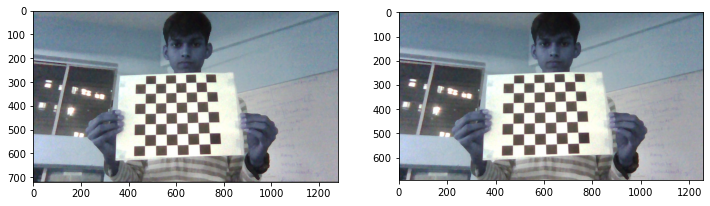

In [7]:
# undistort
dst = cv2.undistort(img, mtx, dist, None, newcameramtx)
# crop the image
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]
cv2.imwrite('calibresult.png',dst)

plt.figure(figsize=(12,8))
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(dst)
plt.show()

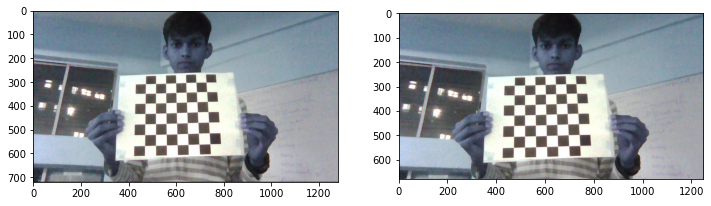

In [8]:
# undistort
mapx,mapy = cv2.initUndistortRectifyMap(mtx,dist,None,newcameramtx,(w,h),5)
dst = cv2.remap(img,mapx,mapy,cv2.INTER_LINEAR)
#dst = cv2.undistort(img, mtx, dist, None, newcameramtx)
# crop the image
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]
cv2.imwrite('calibresult.png',dst)

plt.figure(figsize=(12,8))
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(dst)
plt.show()

In [9]:
tot_error = 0
for i in range(len(objpoints)):
    imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    error = cv2.norm(imgpoints[i],imgpoints2, cv2.NORM_L2)/len(imgpoints2)
    tot_error += error
print("mean error: ", tot_error/len(objpoints))

mean error:  0.08954705496110175
